In [ ]:
from google.colab import files
import pandas as pd

# Prompt user to upload a file
print("Please upload your file from your local PC.")
uploaded_file = files.upload()

# Extract the file name from the uploaded files dictionary
file_name = list(uploaded_file.keys())[0]

# Load the Excel file into a pandas DataFrame
kpi_data = pd.read_excel(file_name, sheet_name="sheet2")

# Display the first few rows to confirm successful loading
print("Preview of the uploaded file:")
print(kpi_data.head())

Please upload your file from your local PC.


Saving Weekly KPI Tracking Template test.xlsx to Weekly KPI Tracking Template test (3).xlsx
Preview of the uploaded file:
     Week                          KPI  Target  Actual Value  Variance  \
0  Week 1                Ticket Volume      25         15.00     10.00   
1  Week 1      Resolution Time (Hours)       4          3.80      0.20   
2  Week 1     User Satisfaction (1-10)      10          8.00      0.00   
3  Week 1  IT Support Satisfaction (%)       1          0.75      0.25   
4  Week 2                Ticket Volume      25         28.00      3.00   

   Number of Resolved Tickets  Number of Unresolved Tickets  \
0                        12.0                           3.0   
1                        12.0                           3.0   
2                         NaN                           NaN   
3                         NaN                           NaN   
4                        26.0                           2.0   

  Status (Met/Not Met)  
0              Not Met  
1   

In [ ]:
print(kpi_data.columns)

Index(['Week', 'KPI', 'Target', 'Actual Value', 'Variance',
       'Number of Resolved Tickets', 'Number of Unresolved Tickets',
       'Status (Met/Not Met)'],
      dtype='object')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

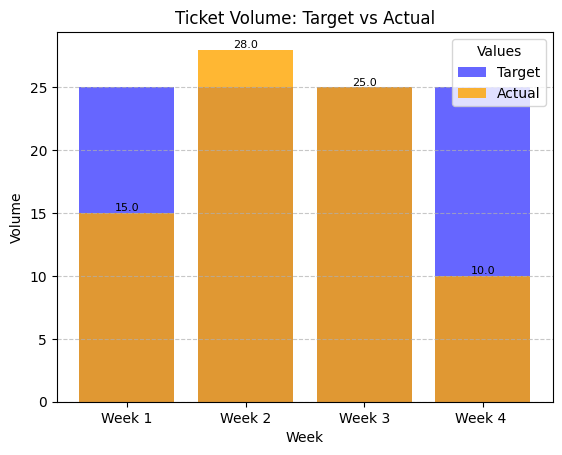

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

# Ticket Volume Target vs Actual
ticket_data = kpi_data[kpi_data['KPI'] == 'Ticket Volume']
plt.bar(ticket_data['Week'], ticket_data['Target'], label='Target', color='blue', alpha=0.6)
plt.bar(ticket_data['Week'], ticket_data['Actual Value'], label='Actual', color='orange', alpha=0.8)

# Add annotations
for index, row in ticket_data.iterrows():
    plt.text(row['Week'], row['Actual Value'], f"{row['Actual Value']}", ha='center', va='bottom', fontsize=8)

plt.title("Ticket Volume: Target vs Actual")
plt.xlabel("Week")
plt.ylabel("Volume")
plt.legend(title="Values")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and auto-download visualization
file_name = "ticket_volume_analysis.png"
plt.savefig(file_name, dpi=300)
files.download(file_name)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

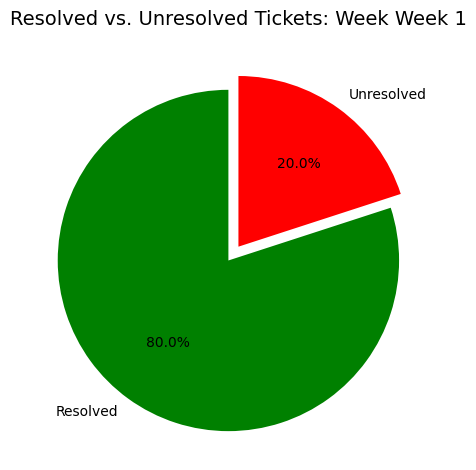

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

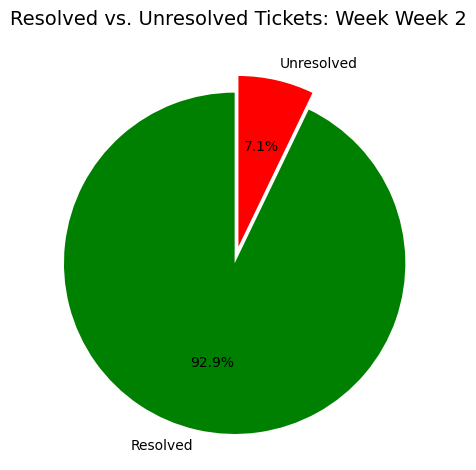

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

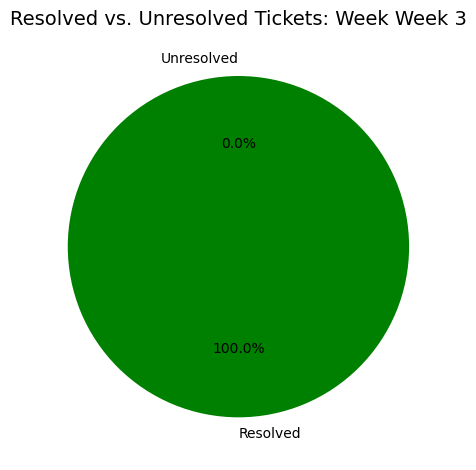

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

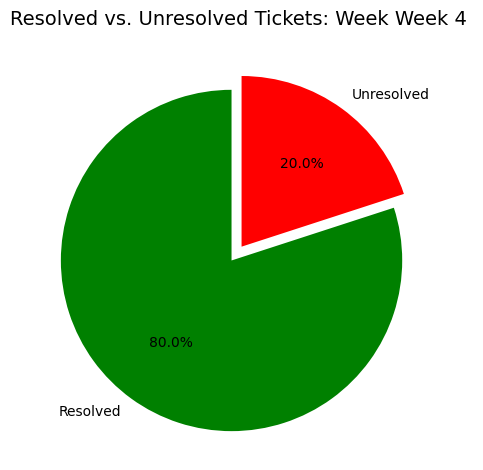

In [ ]:
# Iterate through each week to generate separate pie charts
resolved_unresolved_data = kpi_data[kpi_data['KPI'] == 'Ticket Volume']
weeks = resolved_unresolved_data['Week']

import matplotlib.pyplot as plt
from google.colab import files

for i, week in enumerate(weeks):
    resolved = resolved_unresolved_data.iloc[i]['Number of Resolved Tickets']
    unresolved = resolved_unresolved_data.iloc[i]['Number of Unresolved Tickets']
    sizes = [resolved, unresolved]
    labels = ['Resolved', 'Unresolved']
    colors = ['green', 'red']
    explode = (0.1, 0) if unresolved > 0 else (0, 0)  # Emphasize unresolved if present

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=90)
    plt.title(f"Resolved vs. Unresolved Tickets: Week {week}", fontsize=14)
    plt.tight_layout()

    # Save and download the pie chart
    file_name = f"resolved_vs_unresolved_week_{week}.png"
    plt.savefig(file_name, dpi=300)
    files.download(file_name)
    plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

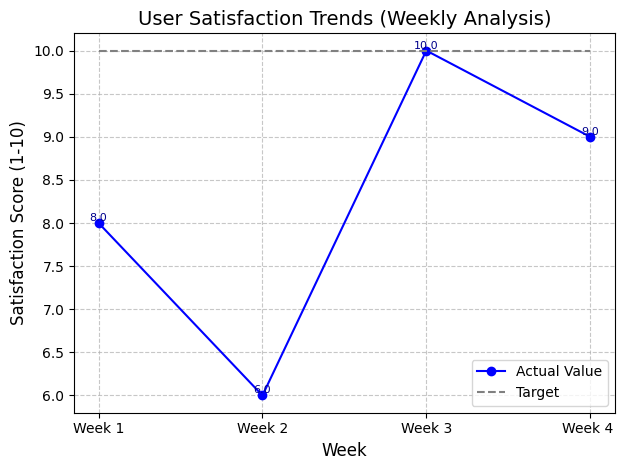

In [ ]:
# Filter data for User Satisfaction KPI
satisfaction_data = kpi_data[kpi_data['KPI'] == 'User Satisfaction (1-10)']

# Plot the trends
import matplotlib.pyplot as plt
plt.plot(satisfaction_data['Week'], satisfaction_data['Actual Value'], marker='o', color='blue', label="Actual Value")
plt.plot(satisfaction_data['Week'], satisfaction_data['Target'], linestyle='--', color='gray', label="Target")

# Annotate data points
for x, y in zip(satisfaction_data['Week'], satisfaction_data['Actual Value']):
    plt.text(x, y, f"{y:.1f}", ha='center', va='bottom', fontsize=8, color="darkblue")

plt.title("User Satisfaction Trends (Weekly Analysis)", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Satisfaction Score (1-10)", fontsize=12)
plt.legend(loc='lower right')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the visualization
file_name = "user_satisfaction_trends.png"
plt.savefig(file_name, dpi=300)

# Auto-download the file
from google.colab import files
files.download(file_name)
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

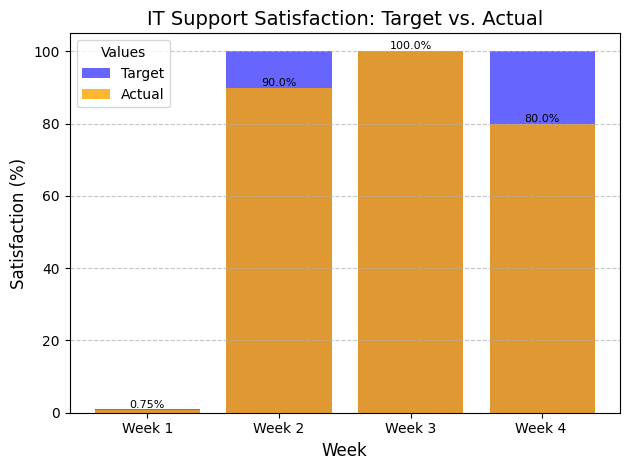

In [ ]:
# Filter data for IT Support Satisfaction KPI
support_satisfaction_data = kpi_data[kpi_data['KPI'] == 'IT Support Satisfaction (%)']

# Create a bar chart
plt.bar(support_satisfaction_data['Week'], support_satisfaction_data['Target'], label='Target', color='blue', alpha=0.6)
plt.bar(support_satisfaction_data['Week'], support_satisfaction_data['Actual Value'], label='Actual', color='orange', alpha=0.8)

# Add annotations
for index, row in support_satisfaction_data.iterrows():
    plt.text(row['Week'], row['Actual Value'], f"{row['Actual Value']}%", ha='center', va='bottom', fontsize=8)

plt.title("IT Support Satisfaction: Target vs. Actual", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Satisfaction (%)", fontsize=12)
plt.legend(title="Values")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save and download the bar chart
file_name = "it_support_satisfaction.png"
plt.savefig(file_name, dpi=300)
files.download(file_name)
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

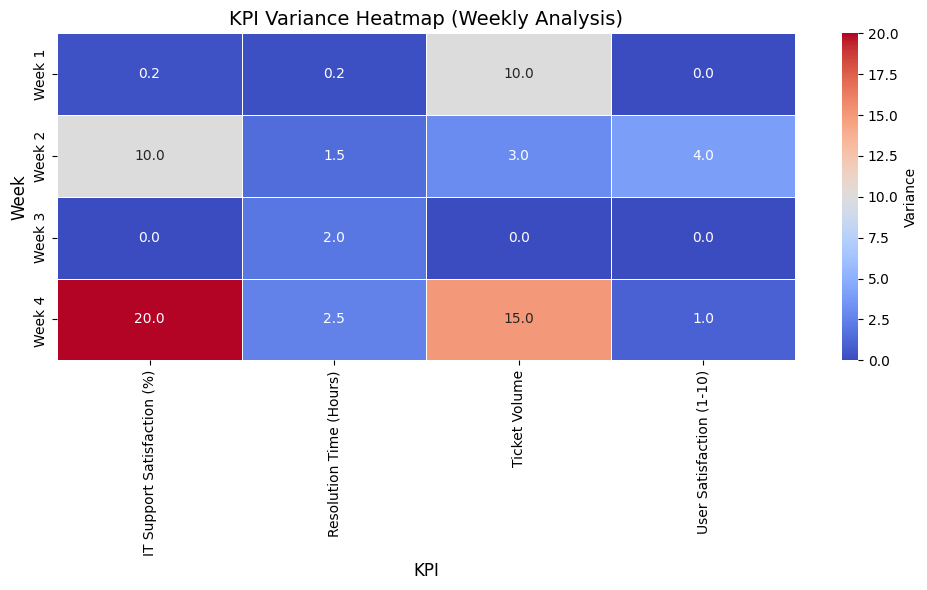

In [ ]:
# Pivot data for the heatmap
import seaborn as sns

heatmap_data = kpi_data.pivot(index='Week', columns='KPI', values='Variance')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5, cbar_kws={'label': 'Variance'})

plt.title("KPI Variance Heatmap (Weekly Analysis)", fontsize=14)
plt.xlabel("KPI", fontsize=12)
plt.ylabel("Week", fontsize=12)
plt.tight_layout()

# Save and download the heatmap
file_name = "variance_heatmap.png"
plt.savefig(file_name, dpi=300)
files.download(file_name)
plt.show()
